In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
# mnist 분류
tf.set_random_seed(777)

In [231]:
from tensorflow.examples.tutorials.mnist import input_data

In [232]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True) # MNIST_data 위치에 저장, one_hot 되어서

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [233]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10]) # mnist에서 0~9까지 총 10가지 숫자가 나올수 있기 때문에 10으로 줘야함
w=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))

In [234]:
hf=tf.nn.softmax(tf.matmul(x,w)+b)

In [235]:
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))

In [236]:
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [237]:
isCorrect=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))

In [238]:
accuracy=tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [239]:
numEpochs=30
batchSize=100
numIter=int(mnist.train.num_examples/batchSize)
# 60000 / 100 = 600

에폭:0001, cost:2.664012645
에폭:0002, cost:1.122327304
에폭:0003, cost:0.888809580
에폭:0004, cost:0.776854574
에폭:0005, cost:0.707442603
에폭:0006, cost:0.658287961
에폭:0007, cost:0.620930457
에폭:0008, cost:0.590861757
에폭:0009, cost:0.565623356
에폭:0010, cost:0.545144398
에폭:0011, cost:0.526915397
에폭:0012, cost:0.510827083
에폭:0013, cost:0.497255454
에폭:0014, cost:0.485231210
에폭:0015, cost:0.473714150
에폭:0016, cost:0.463473346
에폭:0017, cost:0.454809998
에폭:0018, cost:0.446180601
에폭:0019, cost:0.438572190
에폭:0020, cost:0.431376680
에폭:0021, cost:0.425056491
에폭:0022, cost:0.418879810
에폭:0023, cost:0.412906861
에폭:0024, cost:0.407507458
에폭:0025, cost:0.402212210
에폭:0026, cost:0.397720792
에폭:0027, cost:0.393101391
에폭:0028, cost:0.388620468
에폭:0029, cost:0.384340132
에폭:0030, cost:0.380916618
정확도: 0.8987
레이블: [8]
예측: [8]


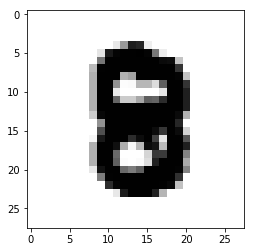

In [240]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 트레이닝
    for epoch in range(numEpochs): # 15 epochs
        avgCv=0
        for i in range(numIter): # 600
            batchX, batchY=mnist.train.next_batch(batchSize) # 한번에 몇개의 data를 읽어올지
            _,cv=sess.run([train, cost],feed_dict={x:batchX, y:batchY})
            avgCv+=cv/numIter
        print("에폭:{:04d}, cost:{:.9f}".format(epoch+1, avgCv))  #{04d} 4자리 십진수
    print("정확도:",accuracy.eval(session=sess, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
    
    r=random.randint(0,mnist.test.num_examples-1)
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("예측:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="Greys")
    plt.show

In [59]:
# 학습 모델 저장 / 불러오기 (keras)

In [60]:
# 다층 퍼셉트론 모델
# 훈련셋, 검증셋, 실험셋

In [61]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [62]:
(xTrain, yTrain), (xTest, yTest)=mnist.load_data()

In [63]:
xTrain=xTrain.reshape(60000,784).astype("float32")/255.0
xTest=xTest.reshape(10000,784).astype("float32")/255.0

In [64]:
yTrain=np_utils.to_categorical(yTrain) # ohe 
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [65]:
yTest=np_utils.to_categorical(yTest) # ohe 
yTest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
xVal=xTrain[42000:]
xTrain=xTrain[:42000]
yVal=yTrain[42000:]
yTrain=yTrain[:42000]

In [83]:
# 모델 구성
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation="relu"))
model.add(Dense(units=10, activation='softmax'))

In [84]:
# 학습 환결 설정(compile)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 학습(fit)
model.fit(xTrain,yTrain, epochs=5, batch_size=50, validation_data=(xVal, yVal))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 32us/step - loss: 1.0130 - accuracy: 0.7485 - val_loss: 0.5164 - val_accuracy: 0.8683
Epoch 2/5
42000/42000 [==============================] - 1s 29us/step - loss: 0.4518 - accuracy: 0.8809 - val_loss: 0.3884 - val_accuracy: 0.8932
Epoch 3/5
42000/42000 [==============================] - 1s 29us/step - loss: 0.3733 - accuracy: 0.8971 - val_loss: 0.3450 - val_accuracy: 0.9013
Epoch 4/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3368 - accuracy: 0.9055 - val_loss: 0.3198 - val_accuracy: 0.9077
Epoch 5/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3134 - accuracy: 0.9126 - val_loss: 0.3023 - val_accuracy: 0.9132


In [85]:
# 모델 평가하기(test data)
metrics=model.evaluate(xTest, yTest, batch_size=50)
print("평가결과:"+str(metrics))

10000/10000 [==============================] - 0s 13us/step
평가결과:[0.2894299391284585, 0.9197999835014343]


In [86]:
idx=np.random.choice(xTest.shape[0],5)
xHat=xTest[idx]
yHat=model.predict_classes(xHat)

In [87]:
xHat
print("예측값:",yHat)
for i in range(5):
    print("예측값:"+str(yHat[i])+" 실제값:"+str(np.argmax(yTest[idx[i]])))

예측값: [3 8 8 4 9]
예측값:3 실제값:3
예측값:8 실제값:8
예측값:8 실제값:8
예측값:4 실제값:4
예측값:9 실제값:9


In [88]:
"""
모델 : 모델 아키텍쳐와 모델 가중치로 구성
모델 아키텍쳐 : 모델이 어떤 층으로 구성
모델 가중치 : weight, bias

save : 케라스 모델 저장 함수(아키텍처+가중치)
파일형식 : h5로 저장
"""

'\n모델 : 모델 아키텍쳐와 모델 가중치로 구성\n모델 아키텍쳐 : 모델이 어떤 층으로 구성\n모델 가중치 : weight, bias\n\nsave : 케라스 모델 저장 함수(아키텍처+가중치)\n파일형식 : h5로 저장\n'

In [89]:
model.save("mnist_model.h5")

In [93]:
#모델 아키텍쳐 확인
# from keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# SVG(model_to_dot(model, show_shapes=True), create(prog='dot', format='svg'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [95]:
# 실제 데이터 사용
(xTrain, yTrain),(xTest,yTest)=mnist.load_data()
xTest=xTest.reshape(10000,784).astype("float32")
yTest=np_utils.to_categorical(yTest)
idx=np.random.choice(xTest.shape[0],10)
xhat=xTest[idx]
# 모델 불러오기
from keras.models import load_model
model=load_model("mnist_model.h5")
yhat=model.predict_classes(xhat)

print("예측값:",yhat)
for i in range(10):
    print("예측값:"+str(yhat[i])+" 실제값:"+str(np.argmax(yTest[idx[i]])))

예측값: [1 4 5 5 9 3 0 6 0 1]
예측값:1 실제값:1
예측값:4 실제값:4
예측값:5 실제값:5
예측값:5 실제값:5
예측값:9 실제값:9
예측값:3 실제값:8
예측값:0 실제값:0
예측값:6 실제값:6
예측값:0 실제값:0
예측값:1 실제값:1


In [152]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [120]:
xdata=xy[:,:4]
ydata=xy[:,[-1]]

In [121]:
ydata

array([[831.659973],
       [828.070007],
       [824.159973],
       [819.23999 ],
       [818.97998 ],
       [820.450012],
       [813.669983],
       [809.559998]])

In [122]:
x=tf.placeholder(tf.float32, shape=[None,4])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

In [123]:
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(y-hf))

In [124]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [125]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(101):
        cv,hv,_=sess.run([cost, hf, train], feed_dict={x:xdata,y:ydata})
        print(step,"cost:",cv,"\nPrediction:",hv)

0 cost: 539657830000.0 
Prediction: [[ 518633.06]
 [1044459.94]
 [ 821558.06]
 [ 575793.6 ]
 [ 678671.94]
 [ 684386.7 ]
 [ 627235.94]
 [ 798697.4 ]]
1 cost: 5.929114e+26 
Prediction: [[-1.7176166e+13]
 [-3.4577381e+13]
 [-2.7200779e+13]
 [-1.9067602e+13]
 [-2.2472187e+13]
 [-2.2661332e+13]
 [-2.0769896e+13]
 [-2.6444202e+13]]
2 cost: inf 
Prediction: [[5.6932719e+20]
 [1.1461140e+21]
 [9.0160657e+20]
 [6.3202145e+20]
 [7.4487103e+20]
 [7.5114046e+20]
 [6.8844613e+20]
 [8.7652884e+20]]
3 cost: inf 
Prediction: [[-1.8871117e+28]
 [-3.7989493e+28]
 [-2.9884963e+28]
 [-2.0949202e+28]
 [-2.4689753e+28]
 [-2.4897560e+28]
 [-2.2819476e+28]
 [-2.9053729e+28]]
4 cost: inf 
Prediction: [[6.2550856e+35]
 [1.2592129e+36]
 [9.9057736e+35]
 [6.9438945e+35]
 [8.1837510e+35]
 [8.2526320e+35]
 [7.5638224e+35]
 [9.6302497e+35]]
5 cost: inf 
Prediction: [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 cost: nan 
Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
7 cost

In [126]:
xy.shape

(8, 5)

In [153]:
def myMinMax(data):
    #print(np.min(data))
    #print(np.min(data, axis=1)) # 행 단위로 최소값 출력
    #print(np.min(data, axis=0)) # 열 단위로 최소값 출력
    
    bm=np.max(data,0)-np.min(data,0)
    bj=data-np.mean(data)
    
    return bj/bm
    
xy=myMinMax(xy)

In [154]:
xy

array([[-1.31304231e+04, -1.38155033e+04,  7.12852418e-01,
        -1.05605816e+04, -1.13775747e+04],
       [-1.31307176e+04, -1.38157989e+04,  1.71285242e+00,
        -1.05608627e+04, -1.13777371e+04],
       [-1.31308789e+04, -1.38160005e+04,  1.28893937e+00,
        -1.05609751e+04, -1.13779140e+04],
       [-1.31310841e+04, -1.38161896e+04,  8.21548070e-01,
        -1.05611217e+04, -1.13781367e+04],
       [-1.31309087e+04, -1.38160775e+04,  1.01720024e+00,
        -1.05609965e+04, -1.13781484e+04],
       [-1.31309275e+04, -1.38160775e+04,  1.02806981e+00,
        -1.05611002e+04, -1.13780819e+04],
       [-1.31313087e+04, -1.38165033e+04,  9.19374157e-01,
        -1.05613615e+04, -1.13783887e+04],
       [-1.31314231e+04, -1.38164258e+04,  1.24546111e+00,
        -1.05615816e+04, -1.13785747e+04]])

In [155]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [156]:
x=tf.placeholder(tf.float32, shape=[None,4])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

In [157]:
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(y-hf))

In [158]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [159]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(101):
        cv,hv,_=sess.run([cost, hf, train], feed_dict={x:xdata,y:ydata})
        print(step,"cost:",cv,"\nPrediction:",hv)

0 cost: 869900300.0 
Prediction: [[18115.633]
 [18114.984]
 [18115.648]
 [18116.434]
 [18115.975]
 [18116.064]
 [18116.666]
 [18116.617]]
1 cost: 7.843981e+16 
Prediction: [[-2.8007066e+08]
 [-2.8007709e+08]
 [-2.8008067e+08]
 [-2.8008474e+08]
 [-2.8008166e+08]
 [-2.8008243e+08]
 [-2.8009050e+08]
 [-2.8009213e+08]]
2 cost: 7.0729993e+24 
Prediction: [[2.6593987e+12]
 [2.6594598e+12]
 [2.6594939e+12]
 [2.6595324e+12]
 [2.6595033e+12]
 [2.6595109e+12]
 [2.6595875e+12]
 [2.6596029e+12]]
3 cost: 6.3777967e+32 
Prediction: [[-2.5253233e+16]
 [-2.5253815e+16]
 [-2.5254137e+16]
 [-2.5254502e+16]
 [-2.5254225e+16]
 [-2.5254296e+16]
 [-2.5255022e+16]
 [-2.5255170e+16]]
4 cost: inf 
Prediction: [[2.3980074e+20]
 [2.3980625e+20]
 [2.3980933e+20]
 [2.3981277e+20]
 [2.3981017e+20]
 [2.3981084e+20]
 [2.3981775e+20]
 [2.3981914e+20]]
5 cost: inf 
Prediction: [[-2.2771102e+24]
 [-2.2771626e+24]
 [-2.2771919e+24]
 [-2.2772248e+24]
 [-2.2771998e+24]
 [-2.2772063e+24]
 [-2.2772717e+24]
 [-2.2772849e+24]]

In [175]:
# xor 문제를 텐서플로우로 구현
# 단일, 멀티 퍼셉트론으로 각각 구현
xdata=np.array([[0,0],
         [0,1],
         [1,0],
         [1,1]])
ydata=np.array([[0],[1],[1],[0]])

# 트레이닝 횟수 : 10000번, lr=0.1

In [176]:
ydata.shape

(4, 1)

In [177]:
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

In [178]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [187]:
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [188]:
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [189]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, W], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv, wv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 1.2581222
500 0.6931862
1000 0.69314796
1500 0.69314724
2000 0.69314724
2500 0.6931472
3000 0.6931472
3500 0.6931472
4000 0.6931472
4500 0.6931472
5000 0.6931472
5500 0.6931472
6000 0.6931472
6500 0.6931472
7000 0.6931472
7500 0.6931472
8000 0.6931472
8500 0.6931472
9000 0.6931472
9500 0.6931472
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [ ]:
# 멀티레이어 퍼셉트론 기반 신경망

In [196]:
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])

# 히든레이어 1
w1=tf.Variable(tf.random_normal([2,2]))
b1=tf.Variable(tf.random_normal([2]))
layer1=tf.sigmoid(tf.matmul(x,w1)+b1)

# 히든레이어 2
w2=tf.Variable(tf.random_normal([2,2]))
b2=tf.Variable(tf.random_normal([2]))
layer2=tf.sigmoid(tf.matmul(layer1,w2)+b2)

# 히든레이어 2
w3=tf.Variable(tf.random_normal([2,1]))
b3=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer2,w3)+b3)

cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv, = sess.run(
                  [train, cost], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.7699648
100 0.69296104
200 0.6929489
300 0.6929409
400 0.6929326
500 0.6929242
600 0.6929155
700 0.69290656
800 0.6928974
900 0.692888
1000 0.6928783
1100 0.69286835
1200 0.69285804
1300 0.6928475
1400 0.6928365
1500 0.6928252
1600 0.6928136
1700 0.6928014
1800 0.6927889
1900 0.69277596
2000 0.6927626
2100 0.6927488
2200 0.69273436
2300 0.69271934
2400 0.69270384
2500 0.69268763
2600 0.6926709
2700 0.6926534
2800 0.6926353
2900 0.69261634
3000 0.69259655
3100 0.692576
3200 0.6925544
3300 0.692532
3400 0.69250846
3500 0.6924839
3600 0.69245815
3700 0.6924312
3800 0.692403
3900 0.69237334
4000 0.69234216
4100 0.6923095
4200 0.69227505
4300 0.69223887
4400 0.6922008
4500 0.69216055
4600 0.69211817
4700 0.69207346
4800 0.69202596
4900 0.69197595
5000 0.6919229
5100 0.69186664
5200 0.691807
5300 0.6917436
5400 0.69167614
5500 0.69160426
5600 0.6915277
5700 0.69144607
5800 0.6913588
5900 0.6912653
6000 0.6911652
6100 0.6910577
6200 0.69094217
6300 0.69081765
6400 0.69068354
6500 0.690538

In [198]:
# widw & deep

x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])

# 히든레이어 1
w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
layer1=tf.nn.relu(tf.matmul(x,w1)+b1)

# 히든레이어 2
w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
layer2=tf.nn.relu(tf.matmul(layer1,w2)+b2)

# 히든레이어 3
w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
layer3=tf.nn.relu(tf.matmul(layer2,w3)+b3)

# 히든레이어 4
w4=tf.Variable(tf.random_normal([10,1]))
b4=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer3,w4)+b4)


cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv, = sess.run(
                  [train, cost], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 3.366342
100 0.0639506
200 0.021660903
300 0.011551621
400 0.0075021717
500 0.0053923046
600 0.0041418285
700 0.0033248079
800 0.002759356
900 0.002337787
1000 0.0020295659
1100 0.0017842192
1200 0.0015851102
1300 0.0009643694
1400 0.00067793246
1500 0.00051825785
1600 0.00041986385
1700 0.00035275868
1800 0.00030393375
1900 0.00026677543
2000 0.00023756747
2100 0.00021398213
2200 0.00019452757
2300 0.00017823417
2400 0.00016429662
2500 0.00015238671
2600 0.00014195278
2700 0.00013281585
2800 0.00012475226
2900 0.000117597985
3000 0.00011112944
3100 0.000105346575
3200 0.000100100326
3300 9.5301264e-05
3400 9.099404e-05
3500 8.695515e-05
3600 8.327397e-05
3700 7.989089e-05
3800 7.679099e-05
3900 7.384015e-05
4000 7.117248e-05
4100 6.862405e-05
4200 6.625447e-05
4300 6.407864e-05
4400 6.200714e-05
4500 6.0054863e-05
4600 5.8236725e-05
4700 5.6478202e-05
4800 5.4853816e-05
4900 5.328904e-05
5000 5.1813684e-05
5100 5.042775e-05
5200 4.9086524e-05
5300 4.784962e-05
5400 4.6657424e-05
550

In [199]:
# 1. mnist - 90% 정확도 넘게 (텐서플로우)
# 2. pima-indians-diabetes 분류

In [264]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True) # MNIST_data 위치에 저장, one_hot 되어서

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [311]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10]) # mnist에서 0~9까지 총 10가지 숫자가 나올수 있기 때문에 10으로 줘야함

In [312]:
w1=tf.Variable(tf.random_normal([784,256]))
b1=tf.Variable(tf.random_normal([256]))
layer1=tf.sigmoid(tf.matmul(x,w1)+b1)

In [313]:
w2=tf.Variable(tf.random_normal([256,10]))
b2=tf.Variable(tf.random_normal([10]))
hf=tf.nn.softmax(tf.matmul(layer1,w2)+b2)

In [315]:
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))

In [316]:
isCorrect=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [326]:
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [327]:
numEpochs=300
batchSize=100
numIter=int(mnist.train.num_examples/batchSize)
# 60000 / 100 = 600

에폭:0001, cost:2.183302653
에폭:0002, cost:0.935786237
에폭:0003, cost:0.730903059
에폭:0004, cost:0.611331568
에폭:0005, cost:0.543310336
에폭:0006, cost:0.487690378
에폭:0007, cost:0.445709616
에폭:0008, cost:0.412744742
에폭:0009, cost:0.385135649
에폭:0010, cost:0.360606949
에폭:0011, cost:0.344021644
에폭:0012, cost:0.325138643
에폭:0013, cost:0.309234860
에폭:0014, cost:0.294522350
에폭:0015, cost:0.280913663
에폭:0016, cost:0.271099304
에폭:0017, cost:0.263518946
에폭:0018, cost:0.252355490
에폭:0019, cost:0.240534138
에폭:0020, cost:0.236922502
에폭:0021, cost:0.228423298
에폭:0022, cost:0.220067570
에폭:0023, cost:0.214020308
에폭:0024, cost:0.209192847
에폭:0025, cost:0.202688233
에폭:0026, cost:0.198053456
에폭:0027, cost:0.191474659
에폭:0028, cost:0.189558957
에폭:0029, cost:0.184023939
에폭:0030, cost:0.177941162
에폭:0031, cost:0.177631528
에폭:0032, cost:0.170314520
에폭:0033, cost:0.168975745
에폭:0034, cost:0.163645932
에폭:0035, cost:0.163530560
에폭:0036, cost:0.155657331
에폭:0037, cost:0.155652508
에폭:0038, cost:0.152442977
에폭:0039, cos

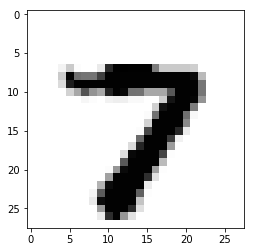

In [328]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 트레이닝
    for epoch in range(numEpochs): # 15 epochs
        avgCv=0
        for i in range(numIter): # 600
            batchX, batchY=mnist.train.next_batch(batchSize) # 한번에 몇개의 data를 읽어올지
            _,cv=sess.run([train, cost],feed_dict={x:batchX, y:batchY})
            avgCv+=cv/numIter
        print("에폭:{:04d}, cost:{:.9f}".format(epoch+1, avgCv))  #{04d} 4자리 십진수
    print("정확도:",accuracy.eval(session=sess, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
    
    r=random.randint(0,mnist.test.num_examples-1)
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("예측:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="Greys")
    plt.show

In [386]:
data=pd.read_csv("C:/Users/student/Downloads/데이터들/dataset/pima-indians-diabetes.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [387]:
data.isnull().sum()
y_data=data.iloc[:,[8]]
xdata=data.iloc[:,:8]

In [388]:
y_data.shape # 768, 1
xdata.shape # 768, 8

(768, 8)

In [389]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(xdata)
x_scaled = scaler.transform(xdata)

In [390]:
x_data=x_scaled

In [421]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=1004)

In [547]:
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])

In [548]:
w1=tf.Variable(tf.random_normal([8,8]))
b1=tf.Variable(tf.random_normal([8]))
layer1=tf.sigmoid(tf.matmul(x,w1)+b1)

In [549]:
w2=tf.Variable(tf.random_normal([8,8]))
b2=tf.Variable(tf.random_normal([8]))
layer2=tf.sigmoid(tf.matmul(layer1,w2)+b2)

In [550]:
w3=tf.Variable(tf.random_normal([8,1]))
b3=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer2,w3)+b3)

In [551]:
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [552]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [553]:
predicted=tf.cast(hf>0.5, dtype=tf.float32)

In [554]:
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [555]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100001):
        cv, _=sess.run([cost, train], feed_dict={x:x_train, y:y_train})
        
        if step%500==0:
            print(step, cv)
    _,pv,av=sess.run([hf, predicted, accuracy], feed_dict={x:x_test, y:y_test})
    print("정확도 : ",av)

0 0.8860155
500 0.66135806
1000 0.62588125
1500 0.6029617
2000 0.5847513
2500 0.5686955
3000 0.5539643
3500 0.5403729
4000 0.52795666
4500 0.5167828
5000 0.50687504
5500 0.4981986
6000 0.49067235
6500 0.48418838
7000 0.4786276
7500 0.47387013
8000 0.46980157
8500 0.46631593
9000 0.4633179
9500 0.46072295
10000 0.45845807
10500 0.45646068
11000 0.45467854
11500 0.4530686
12000 0.45159605
12500 0.45023283
13000 0.44895718
13500 0.44775173
14000 0.4466031
14500 0.4455007
15000 0.44443622
15500 0.44340312
16000 0.44239607
16500 0.44141108
17000 0.44044444
17500 0.43949372
18000 0.43855622
18500 0.43763044
19000 0.4367148
19500 0.43580806
20000 0.43490976
20500 0.4340192
21000 0.43313617
21500 0.43226093
22000 0.4313937
22500 0.43053502
23000 0.4296856
23500 0.4288462
24000 0.42801794
24500 0.42720136
25000 0.42639717
25500 0.42560628
26000 0.42482904
26500 0.42406562
27000 0.42331612
27500 0.4225807
28000 0.4218591
28500 0.4211512
29000 0.42045638
29500 0.41977412
30000 0.419104
30500 0.41